4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


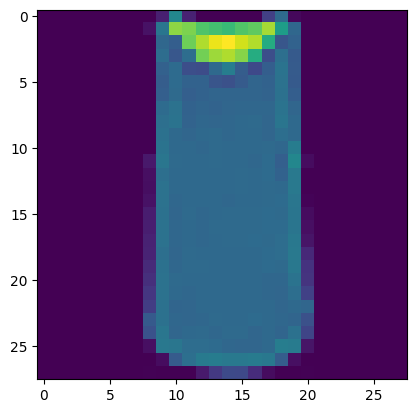

Nomor Label = 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[2])
plt.show()
print('Nomor Label =',y_train[2])


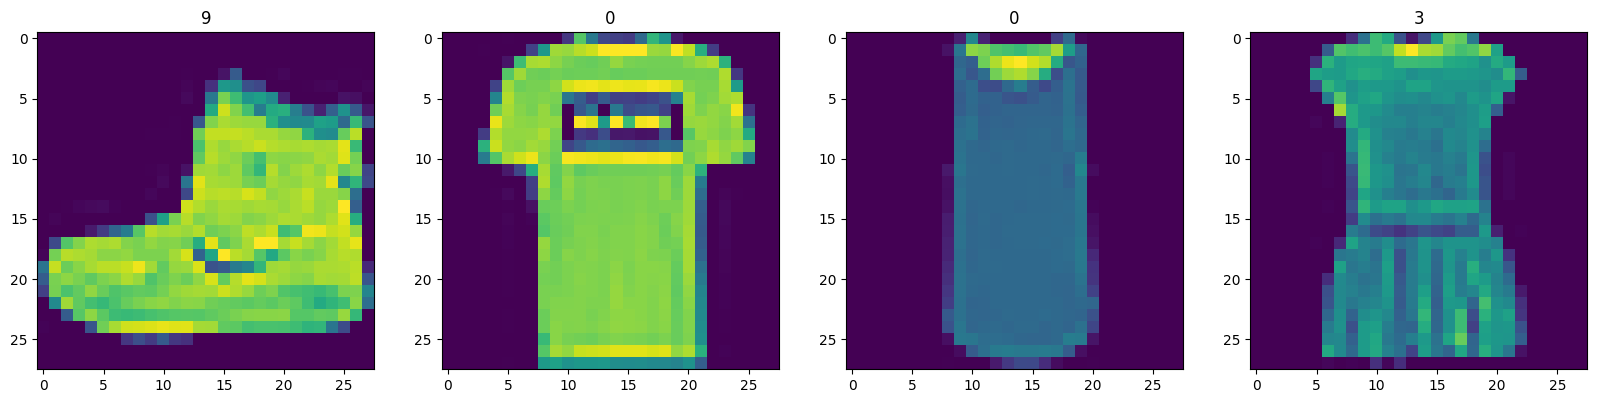

In [ ]:
 fig, ax = plt.subplots(ncols=4, figsize=(20,20))
 for i in range (4):
  data = x_train[i]
  data2 = y_train[i]
  ax[i].imshow(np.squeeze(data))
  ax[i].set_title(data2)

In [ ]:
data = x_train/255
label = y_train
buffer_size = 60000
batch_size = 128

train_dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size).batch(batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D,BatchNormalization

def build_generator():

  model = Sequential()

  #Generator dasar
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  #Generator UpSampling 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(0.2))

  #Generator UpSampling 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(0.2))

  #Generator Conv2D 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Generator Conv2D 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Last layer
  model.add(Conv2D(1,4, padding='same', activation='sigmoid'))

  return model

In [ ]:
generator = build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                          

In [ ]:
img = generator.predict(np.random.randn(4,128,1))
print(np.squeeze(img))

1/1 [==============================] - 0s 35ms/step
[[[0.49509063 0.49954408 0.50318205 ... 0.50646037 0.506496   0.5018001 ]
  [0.4990662  0.511719   0.5080822  ... 0.50965464 0.5082261  0.5049527 ]
  [0.49115223 0.5049763  0.5074529  ... 0.50910753 0.5089307  0.50508386]
  ...
  [0.4996075  0.502375   0.5020993  ... 0.5044434  0.5083562  0.50733405]
  [0.50228596 0.49784178 0.50210404 ... 0.5068482  0.5031443  0.5021483 ]
  [0.4997721  0.49767095 0.4982458  ... 0.49823752 0.49975896 0.4992598 ]]

 [[0.50438917 0.49898586 0.5023555  ... 0.5069054  0.5088848  0.50355947]
  [0.50007516 0.50618243 0.5064634  ... 0.5123531  0.51195294 0.50515306]
  [0.4958944  0.49872628 0.5090501  ... 0.51219165 0.5107152  0.50615275]
  ...
  [0.5018056  0.49734908 0.50257367 ... 0.5046233  0.5078381  0.5089364 ]
  [0.50047964 0.49886462 0.50546336 ... 0.5070534  0.5041169  0.50449234]
  [0.50057375 0.4993635  0.4972039  ... 0.5046437  0.50303817 0.50007266]]

 [[0.5002915  0.49925262 0.50511545 ... 0.50

In [ ]:
img.shape

(4, 28, 28, 1)

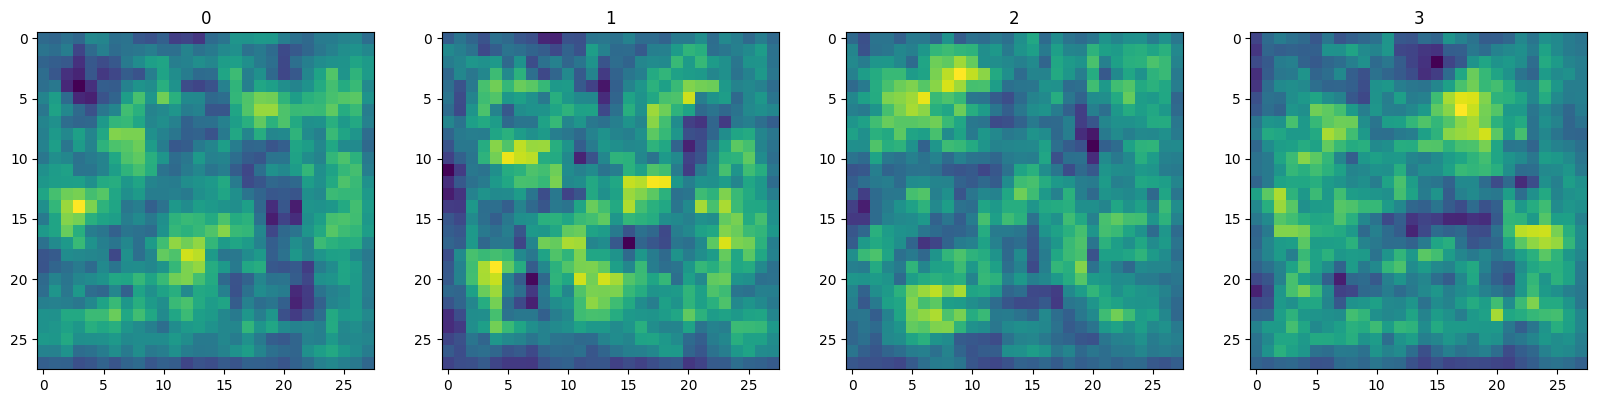

In [ ]:
 fig, ax = plt.subplots(ncols=4, figsize=(20,20))
 for i, img in enumerate (img):
  ax[i].imshow(np.squeeze(img))
  ax[i].set_title(i)

In [ ]:
def build_discriminator():
  model = Sequential()

  #Conv pertama
  model.add(Conv2D(32,5, input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Conv Kedua
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Conv Ketiga
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  #Conv ke empat
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)      

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 255ms/step


array([[0.50152177],
       [0.50167745],
       [0.50148594],
       [0.5016335 ]], dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [ ]:
from tensorflow.keras.models import Model
class GAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.generator = generator
    self.discriminator = discriminator


  def compile(self,g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args, **kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training=False)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis= 0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      gen_images = self.generator(tf.random.normal((128,128,1) ), training=True)
      predicted_labels = self.discriminator(gen_images, training=False)
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    ggrad= g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss":total_d_loss, "g_loss":total_g_loss}



In [ ]:
fashgan = GAN(generator, discriminator)
fashgan.compile(g_opt, d_opt, g_loss, d_loss)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs = None):
    random_latent_vectors = tf.random.uniform([self.num_img, self.latent_dim,1])
    generated_image = self.model.generator(random_latent_vectors)
    generated_image *= 255
    generated_image.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_image[i])
      #img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))


In [ ]:
hist = fashgan.fit(train_dataset, epochs=100, callbacks=[ModelMonitor()])

Epoch 1/100
  6/469 [..............................] - ETA: 1:19 - d_loss: 0.6924 - g_loss: 0.6941

469/469 [==============================] - 97s 182ms/step - d_loss: 0.6946 - g_loss: 0.6817
Epoch 2/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.6925 - g_loss: 0.7025
Epoch 3/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.6764 - g_loss: 0.7802
Epoch 4/100
469/469 [==============================] - 85s 180ms/step - d_loss: 0.5343 - g_loss: 0.6588
Epoch 5/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.3307 - g_loss: 0.2382
Epoch 6/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.3030 - g_loss: 0.0576
Epoch 7/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.2899 - g_loss: 0.0516
Epoch 8/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.2866 - g_loss: 0.0419
Epoch 9/100
469/469 [==============================] - 85s 181ms/step - d_loss: 0.2831 - g_loss: 0.0375
Epoch 10/100
469/469 [==============================] - 85s 181ms/step - d_l

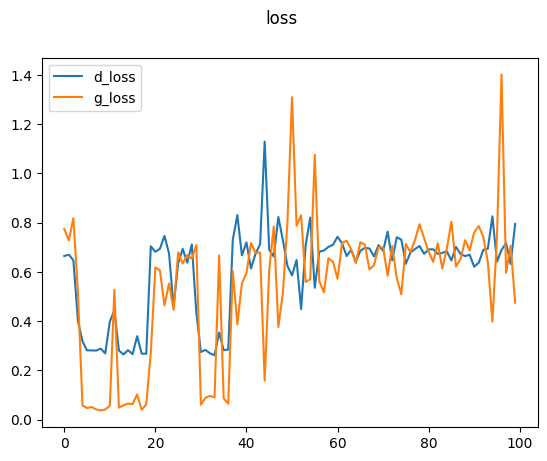

In [ ]:
plt.suptitle('loss')
plt.plot(hist.history['d_loss'], label= 'd_loss')
plt.plot(hist.history['g_loss'], label= 'g_loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 307ms/step


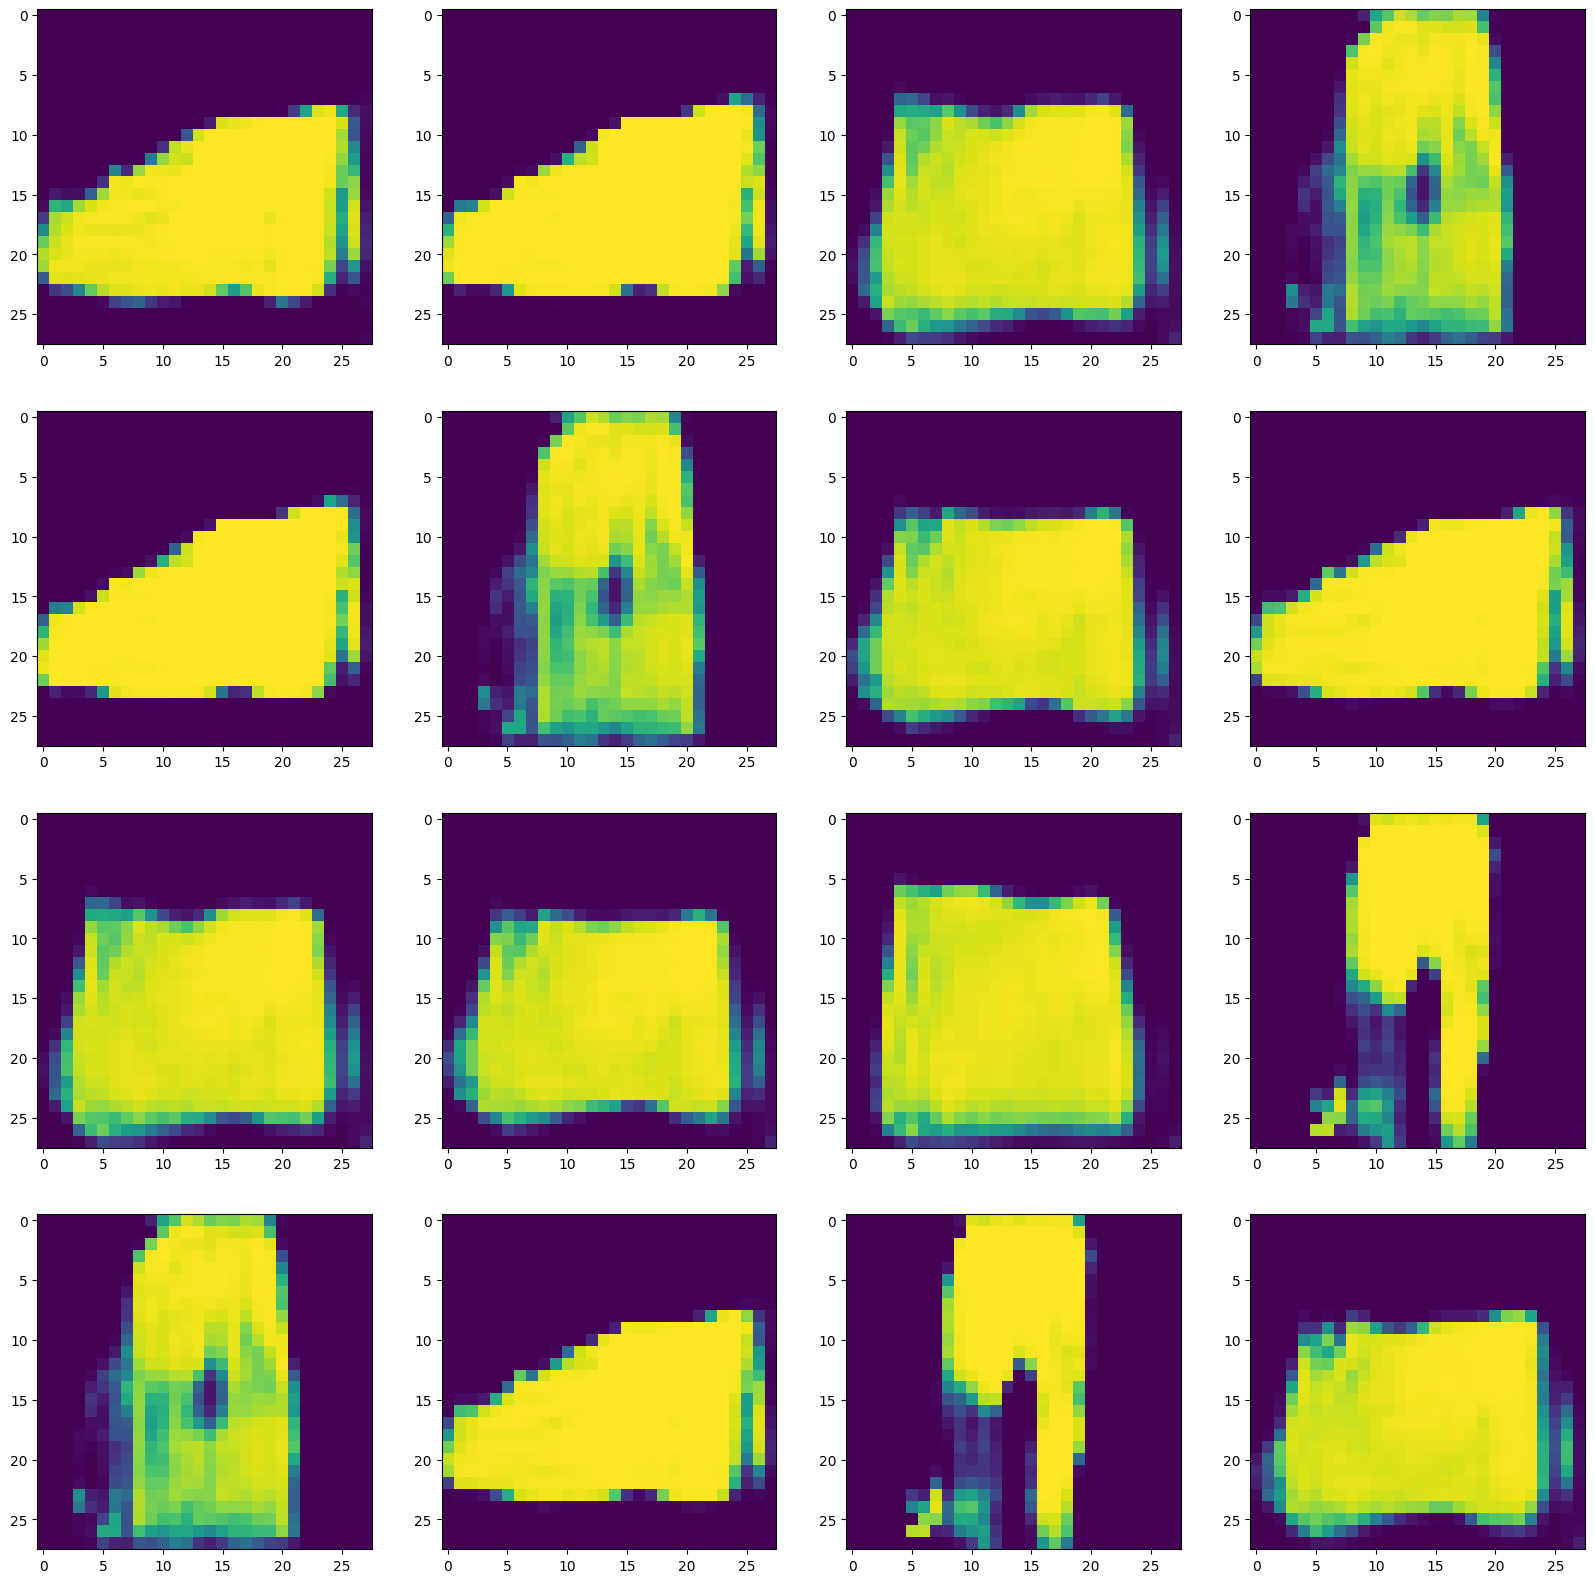

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))
fig, ax = plt.subplots(ncols= 4, nrows = 4, figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generatorepoch100.h5')
discriminator.save('discriminatorepoch100.h5')

In [ ]:
generator.load_weights('generatorepoch100.h5')

1/1 [==============================] - 0s 23ms/step


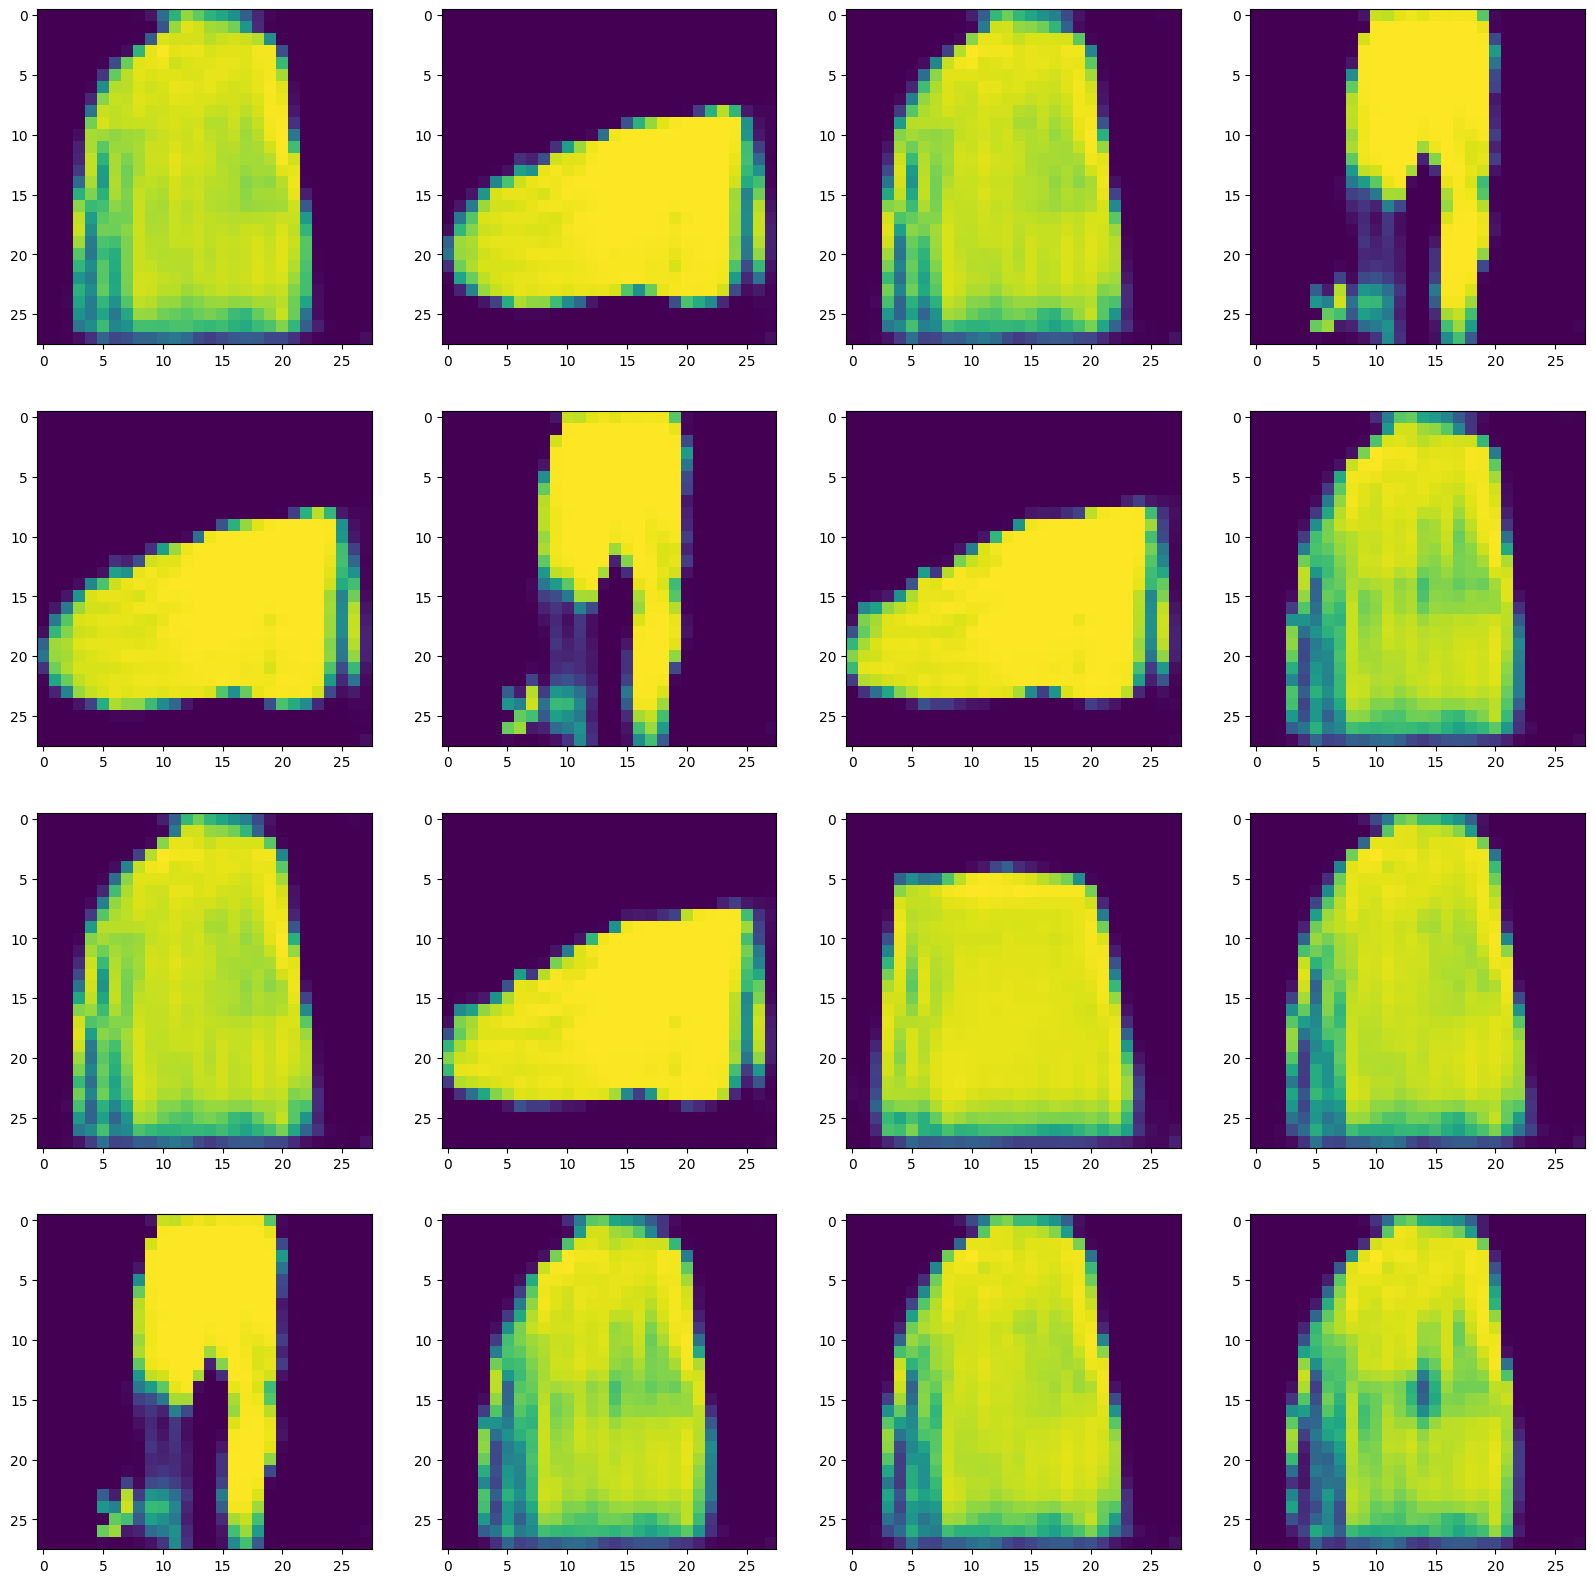

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))
fig, ax = plt.subplots(ncols= 4, nrows = 4, figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])